    1. Package load
    2. Data load
    3. Data 탐색(EDA)
    4. 상관분석
    
    5. 결론 : 경기도 고양시 일산동구 ( 16052 )
       1) 오후 5시 이후 부터 다음날 오전 0시까지 많이 빌림
       2) 계절적 : 20대 7월, 8월,5월 순 / 29,33주차 순 
       3) 차종 : 경형 >  준중형 > 준중형suv  / 2,6,12월 경형   
          - 경형:  44.144032 , 준중형: 25.828557,  준중형SUV: 16.483927, 소형SUV : 6.846499, ,  
       4) 토요일: 16.982308 , 일요일: 16.459008 .. 그외 13,12%
       5) term 제외 : 장기 렌트 제외 
          91%로 계산 :14614  ... 결과 다소 나음 
          나이 50대 이하 , 차종 4가지(경형, 준중형, 소형suv, 준준형suv) 계산 : 13010 (81%)


In [1]:
# pandas를 pd이름으로 호출
import requests
from io import BytesIO
from itertools import product
from datetime import datetime

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.ticker as plticker
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

plt.rc('font', family='NanumGothic')
plt.rcParams['font.size'] = 14
plt.rcParams["figure.figsize"] = (22,4)

In [2]:
# customer_lib_1.csv 파일을 불러와서 변수 customer_1 값으로 할당

df = pd.read_csv('../div_data/고양시 일산서구.csv')
df_final = pd.read_csv('../data/230119_final_join.csv')

In [3]:
df_final['region2'].unique()

array(['고양시 덕양구', '고양시 일산동구', '고양시 일산서구', '광명시', '구리시', '김포시', '남양주시',
       '성남시 분당구', '성남시 수정구', '성남시 중원구', '안양시 동안구', '안양시 만안구', '양평군',
       '의정부시', '하남시', '화성시'], dtype=object)

In [4]:
#data 확인
df.head()

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model,r_week_day,s_week_day,is_weekend,r_weeknum,r_year,r_month,r_yyyyww,s_weeknum,s_year,s_month,s_yyyyww,date_term
0,경기도,고양시 일산서구,2019-04-12 16:57:10+00:00,2019-04-12 09:00:00+00:00,3,male,경형,4,4,0,15,2019,2019-04,2019-15,15,2019,2019-04,2019-15,7.95
1,경기도,고양시 일산서구,2019-05-16 01:21:12+00:00,2019-05-15 18:20:00+00:00,1,male,경형,3,2,0,20,2019,2019-05,2019-20,20,2019,2019-05,2019-20,7.02
2,경기도,고양시 일산서구,2019-05-27 23:58:26+00:00,2019-05-27 18:00:00+00:00,1,male,경형,0,0,0,22,2019,2019-05,2019-22,22,2019,2019-05,2019-22,5.97
3,경기도,고양시 일산서구,2019-04-08 00:30:23+00:00,2019-04-07 19:00:00+00:00,1,male,준중형,0,6,1,15,2019,2019-04,2019-15,14,2019,2019-04,2019-14,5.51
4,경기도,고양시 일산서구,2019-05-14 02:16:51+00:00,2019-05-13 20:00:00+00:00,1,male,준중형,1,0,0,20,2019,2019-05,2019-20,20,2019,2019-05,2019-20,6.28


In [5]:
#EDA  ... 지역 확인
print("region1 : ",len(df['region1'].unique()))
print(df['region1'].unique())
print("region2 : ",len(df['region2'].unique()))
print(df['region2'].unique())
print(len(df))

region1 :  1
['경기도']
region2 :  1
['고양시 일산서구']
16052


In [6]:
df['index_int'] = ''

for i , value in enumerate(df['region1']):
    df['index_int'][i] = i


/tmp/ipykernel_444/3612480014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['index_int'][i] = i


In [7]:
df['reservation_return_hour3'] = ''
for i , value in enumerate(df['reservation_return_at']):
    temp = str(df['reservation_return_at'][i])
    df['reservation_return_hour3'][i] = temp[10:13]

/tmp/ipykernel_444/818228797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reservation_return_hour3'][i] = temp[10:13]


In [8]:
#column 변경  : object > date 
df['reservation_return_at'] = pd.to_datetime(df['reservation_return_at'])
df['reservation_start_at'] = pd.to_datetime(df['reservation_start_at'])
df['gender'] = df['gender'].astype(str)
df['car_model'] = df['car_model'].astype(str)
df['region1'] = df['region1'].astype(str)
df['region2'] = df['region2'].astype(str)

In [9]:

df['reservation_return_date'] = df['reservation_return_at'].dt.to_period(freq = 'D')
df['reservation_start_date'] = df['reservation_start_at']. dt.to_period(freq = 'D')
df['reservation_return_hour'] = df['reservation_return_at'].dt.to_period(freq = 'H')
df['reservation_start_hour'] = df['reservation_start_at']. dt.to_period(freq = 'H')


/opt/conda/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [10]:
temp_hour = df['reservation_return_hour3'].value_counts().sort_index()

In [11]:
df_weekend = df[df['is_weekend'] == 1]  
print(len(df_weekend))
print(round(len(df_weekend)/len(df),2))
temp_weekend_hour = df_weekend['reservation_return_hour3'].value_counts().sort_index()

5368
0.33


In [12]:
df_weekday = df[df['is_weekend'] == 0]  
print(len(df_weekday))
print(round(len(df_weekday)/len(df),2))
temp_weekday_hour = df_weekday['reservation_return_hour3'].value_counts().sort_index()

10684
0.67


<AxesSubplot:>

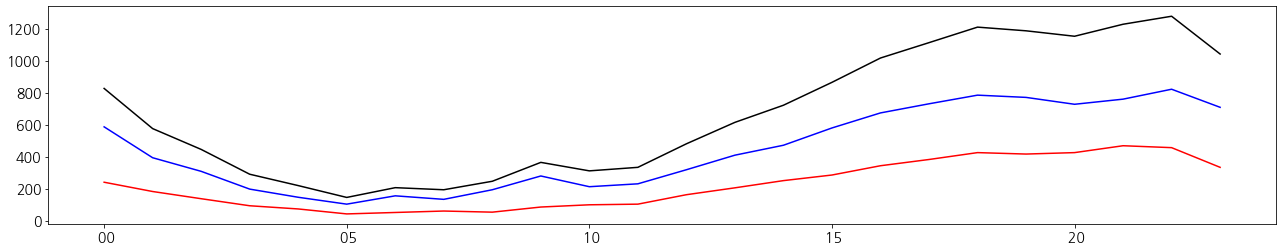

In [13]:
temp_hour.plot(color='black')
temp_weekday_hour.plot(color='blue')
temp_weekend_hour.plot(color='red')

In [14]:
print("s_month : ",len(df['s_month'].unique()))
print(df['s_month'].unique())
print(df['s_month'].value_counts().sort_index())

s_month :  13
['2019-04' '2019-05' '2019-10' '2019-02' '2019-11' '2019-08' '2019-06'
 '2019-07' '2019-03' '2019-01' '2019-09' '2019-12' '2018-12']
2018-12       1
2019-01    1341
2019-02    1303
2019-03    1420
2019-04    1457
2019-05    1587
2019-06    1529
2019-07    1596
2019-08    1610
2019-09    1407
2019-10    1429
2019-11    1347
2019-12      25
Name: s_month, dtype: int64


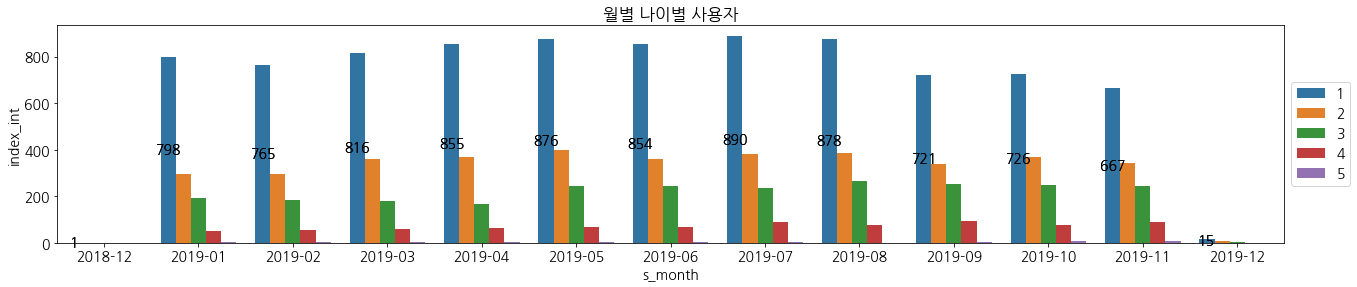

In [15]:
#EDA  ... 지역별 월별 사용자 확인(3) .. 지역 2
grouped = df.groupby([df['age_group'], df['s_month']]).count().sort_values(by='s_month')
ax = sns.barplot(data=grouped.reset_index(), x='s_month', y='index_int', hue='age_group')

containers = ax.containers[0]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
# plt.rcParams['font.size'] = 8
plt.title('월별 나이별 사용자')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# 20대 7월, 8월,5월 순 

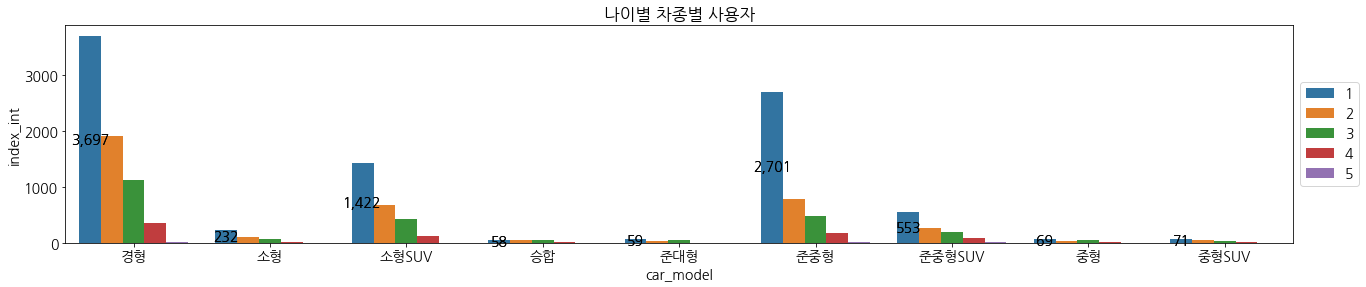

In [16]:
#EDA  ... 지역별 월별 사용자 확인(3) .. 지역 2
grouped = df.groupby([df['age_group'], df['car_model']]).count().sort_values(by='car_model')
ax = sns.barplot(data=grouped.reset_index(), x='car_model', y='index_int', hue='age_group')

containers = ax.containers[0]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
# plt.rcParams['font.size'] = 8
plt.title('나이별 차종별 사용자')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# 20대, 경형, 소형suv , 준중형 순

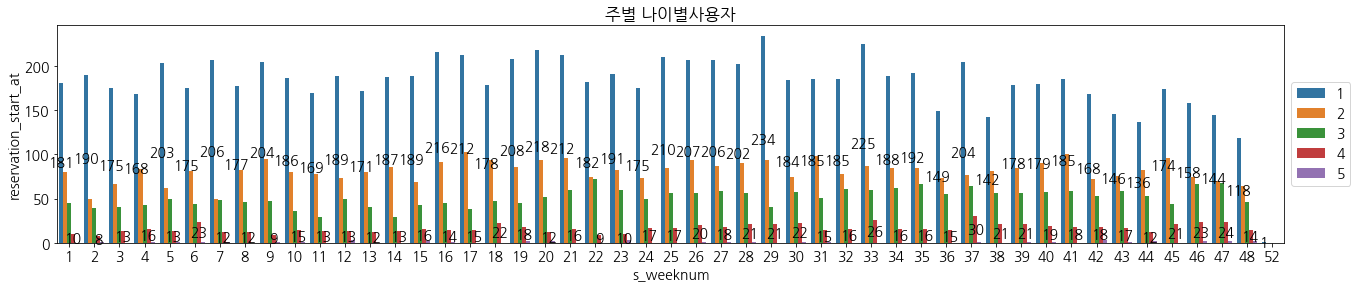

In [17]:
#EDA  ... 지역별 월별 사용자 확인(3) .. 지역 2
grouped = df.groupby([df['age_group'], df['s_weeknum']]).count().sort_values(by='s_weeknum')
ax = sns.barplot(data=grouped.reset_index(), x='s_weeknum', y='reservation_start_at', hue='age_group')

containers = ax.containers[-2]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
# plt.rcParams['font.size'] = 8
plt.title('주별 나이별사용자')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#20대 29,33주차 순 

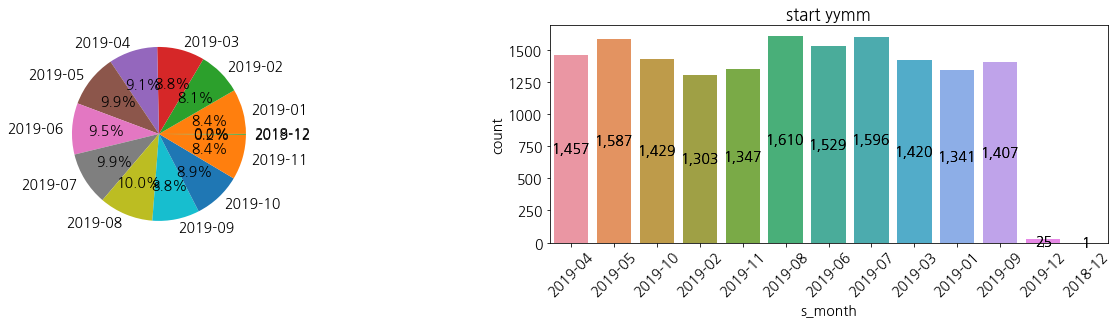

In [18]:
# axes[0].plot(x, y)
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,4)

pie_data = df.groupby(['s_month']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
# plt.title('지역별 사용자')

ax = sns.countplot(data=df, x='s_month')  #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('start yymm')
plt.xticks(rotation=45)
plt.show()
# 10월, 7월 순

In [19]:
print(df['age_group'].unique())
print(df['age_group'].value_counts()) # 1 : 20~29 세, 2 : 30~39 세, 3 : 40~49 세,- 4 : 50~59 세,- 5 : 60세 이상

[3 1 2 4 5]
1    8862
2    3900
3    2458
4     792
5      40
Name: age_group, dtype: int64


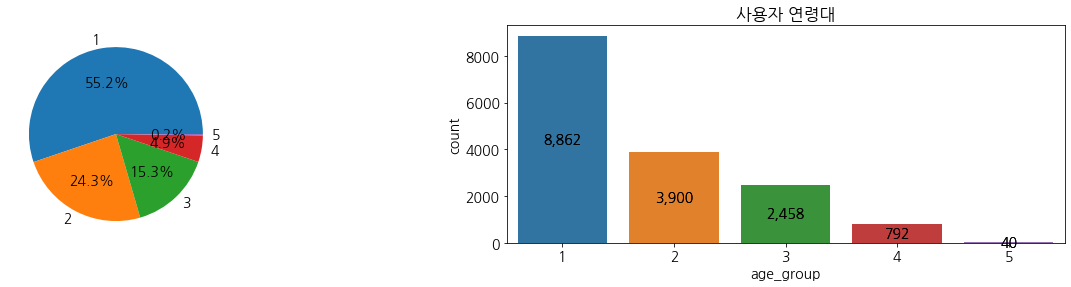

In [20]:
#EDA  ...사용자 연령대 (1)
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,4)

pie_data = df.groupby(['age_group']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('사용자 연령대')

ax = sns.countplot(data=df, x='age_group')   #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('사용자 연령대')
plt.show()

In [21]:
#EDA  ...사용자 연령대 (2)
print(df['gender'].unique())
print(df['gender'].value_counts()) # 1 : 20~29 세, 2 : 30~39 세, 3 : 40~49 세,- 4 : 50~59 세,- 6 : 60세 이상

['male' 'female' 'unknown']
male       11881
female      3668
unknown      503
Name: gender, dtype: int64


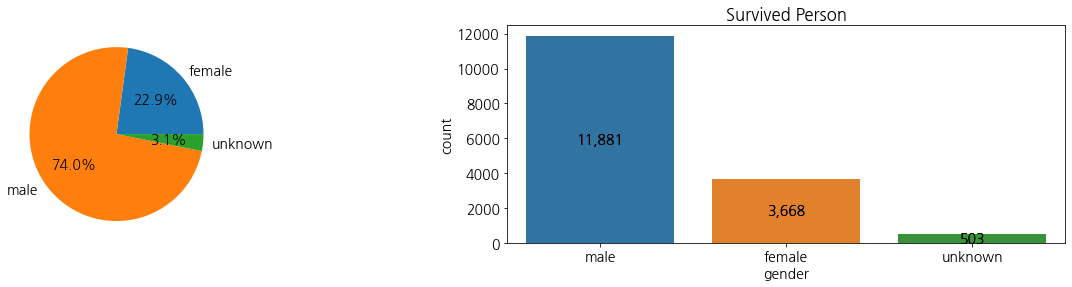

In [22]:
#EDA  ...사용자 성별(1)
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,4)

pie_data = df.groupby(['gender']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('지역별 사용자')

ax = sns.countplot(data=df, x='gender')   #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Survived Person')
plt.show()

In [23]:
#EDA  ...차종별  ['경형' '준중형' 준중형SUV' '소형SUV' '소형' '준대형' '중형' ??? 중형SUV' '승합' '??수입' ??'대형']
print("car_model : ",len(df['car_model'].unique()))
print(df['car_model'].unique().sort())
print(df['car_model'].value_counts()) 

car_model :  9
None
경형        7086
준중형       4146
소형SUV     2646
준중형SUV    1099
소형         420
승합         178
중형         164
중형SUV      161
준대형        152
Name: car_model, dtype: int64


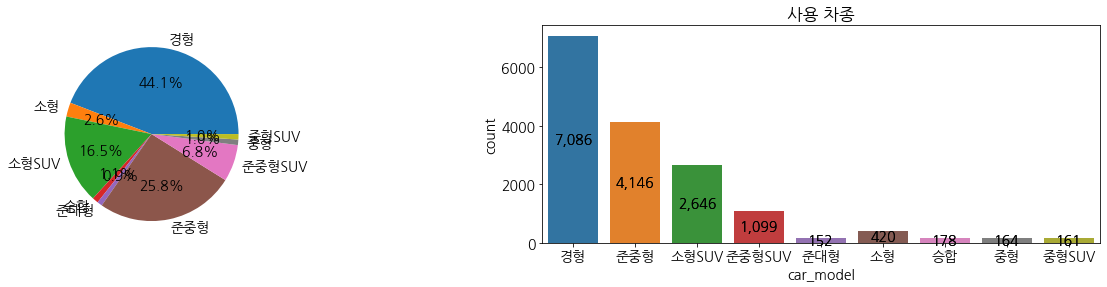

In [24]:
#EDA  ...차종별(1)
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,4)

pie_data = df.groupby(['car_model']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('사용 차종')

ax = sns.countplot(data=df, x='car_model')   #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('사용 차종')
plt.show()

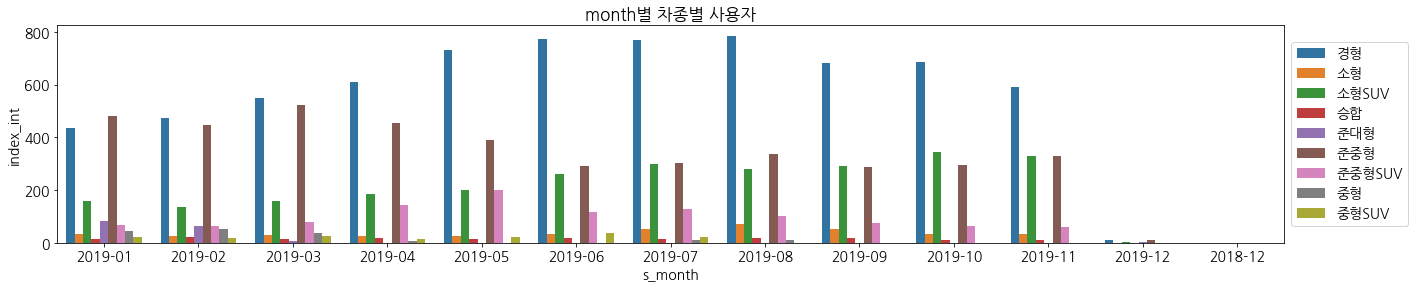

In [25]:
#EDA  ...차종별(1)  ..+지역별
grouped = df['index_int'].groupby([df['region2'], df['car_model'],df['s_month']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='s_month', y='index_int', hue='car_model')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('month별 차종별 사용자')
# plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#2,3,4,5 준중형, 그 외 경형

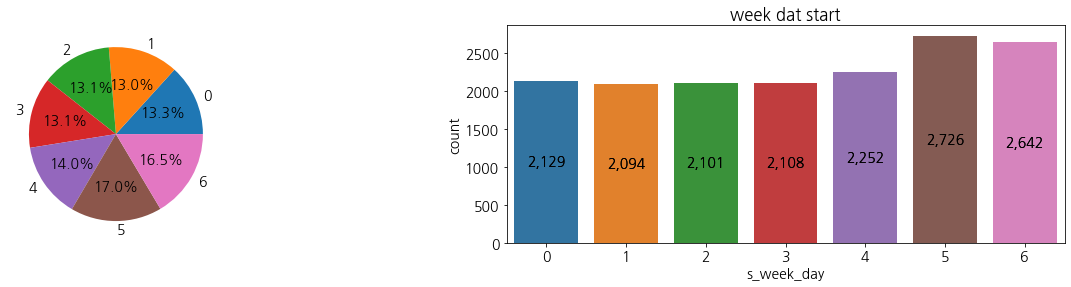

In [26]:
#EDA  ...weekday(1)  0 월요일 .... 6 일요일
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,6)
plt.rc('figure', titlesize=12)
plt.rc('axes', labelsize=10) 

pie_data = df.groupby(['s_week_day']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('week dat start')

ax = sns.countplot(data=df, x='s_week_day')   #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('week dat start')
plt.show()

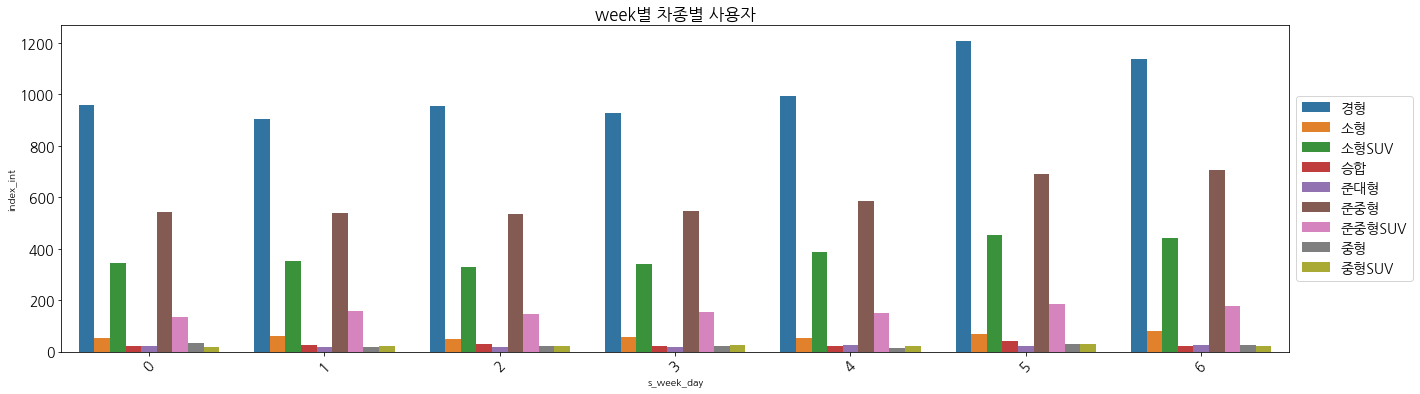

In [27]:
#EDA  ...차종별(1)  ..+지역별2
grouped = df['index_int'].groupby([df['s_week_day'], df['car_model']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='s_week_day', y='index_int', hue='car_model')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('week별 차종별 사용자')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#경형, > 준중형 > 소형suv

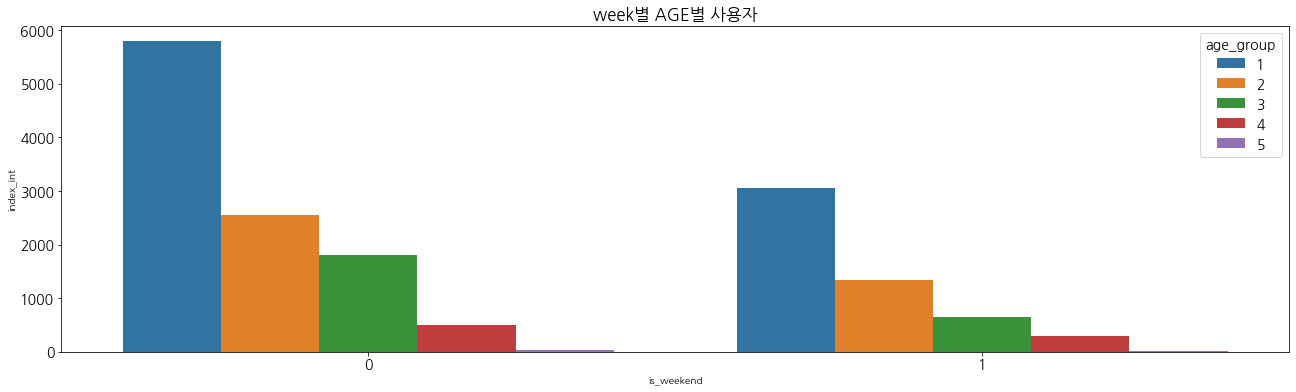

In [28]:
#EDA  ...weekday(1) + 지역
grouped = df['index_int'].groupby([df['is_weekend'],df['age_group']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='is_weekend', y='index_int', hue='age_group')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('week별 AGE별 사용자')
# plt.xticks(rotation=45)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


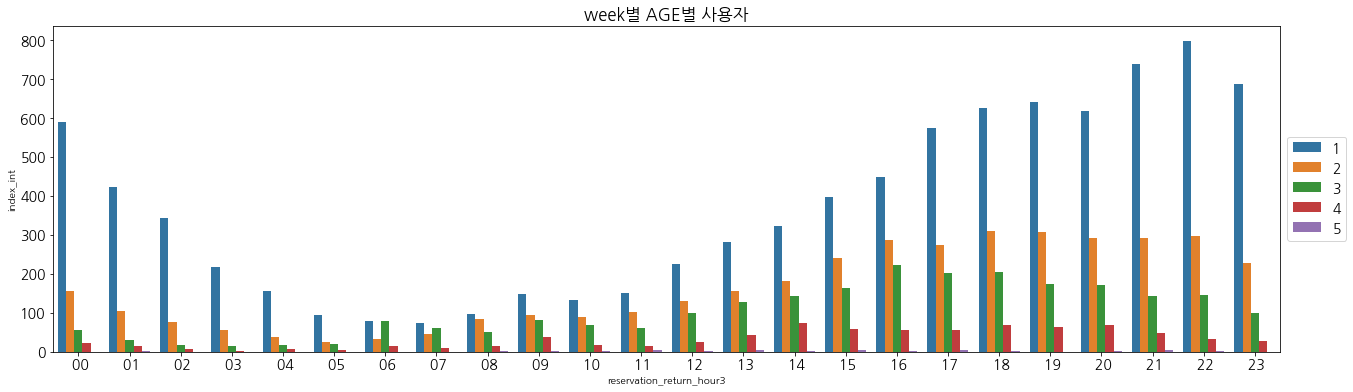

In [29]:
#EDA  ...weekday(1) + 지역
grouped = df['index_int'].groupby([df['reservation_return_hour3'],df['age_group']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='reservation_return_hour3', y='index_int', hue='age_group')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('week별 AGE별 사용자')
# plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#오후 3시 이후 많이 빌림

In [30]:
df['reservation_return_hour3'].value_counts().sort_index()

 00     826
 01     575
 02     445
 03     290
 04     219
 05     145
 06     206
 07     193
 08     246
 09     364
 10     311
 11     333
 12     480
 13     614
 14     721
 15     864
 16    1016
 17    1112
 18    1209
 19    1186
 20    1152
 21    1227
 22    1277
 23    1041
Name: reservation_return_hour3, dtype: int64

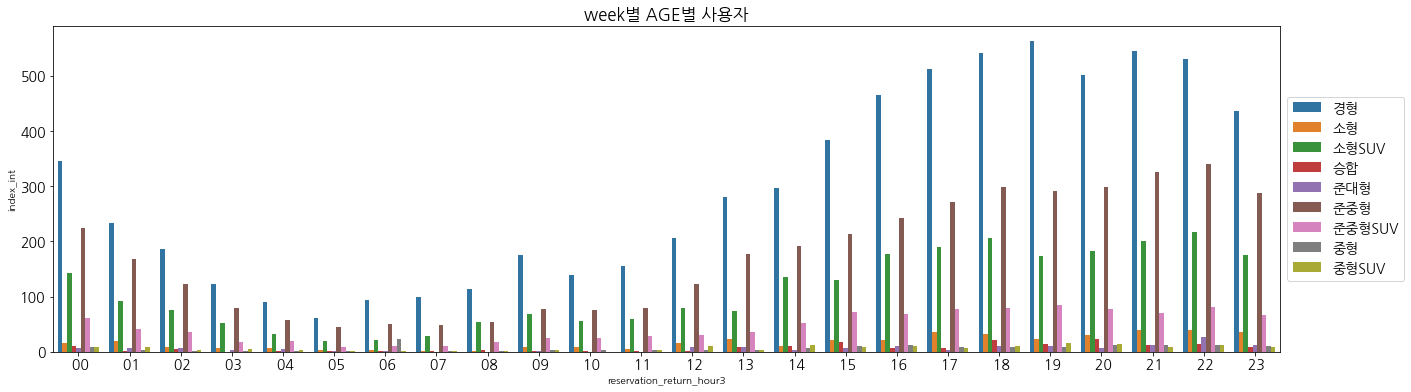

In [31]:
#EDA  ...weekday(1) + 지역
grouped = df['index_int'].groupby([df['reservation_return_hour3'],df['car_model']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='reservation_return_hour3', y='index_int', hue='car_model')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('week별 AGE별 사용자')
# plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


상관분석---------------------------------------------------------------------------------------------------------------------------

In [31]:
df1 = df

In [32]:
df1.head()

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model,r_week_day,s_week_day,is_weekend,...,s_year,s_month,s_yyyyww,date_term,index_int,reservation_return_hour3,reservation_return_date,reservation_start_date,reservation_return_hour,reservation_start_hour
0,경기도,고양시 일산서구,2019-04-12 16:57:10+00:00,2019-04-12 09:00:00+00:00,3,male,경형,4,4,0,...,2019,2019-04,2019-15,7.95,0,16,2019-04-12,2019-04-12,2019-04-12 16:00,2019-04-12 09:00
1,경기도,고양시 일산서구,2019-05-16 01:21:12+00:00,2019-05-15 18:20:00+00:00,1,male,경형,3,2,0,...,2019,2019-05,2019-20,7.02,1,01,2019-05-16,2019-05-15,2019-05-16 01:00,2019-05-15 18:00
2,경기도,고양시 일산서구,2019-05-27 23:58:26+00:00,2019-05-27 18:00:00+00:00,1,male,경형,0,0,0,...,2019,2019-05,2019-22,5.97,2,23,2019-05-27,2019-05-27,2019-05-27 23:00,2019-05-27 18:00
3,경기도,고양시 일산서구,2019-04-08 00:30:23+00:00,2019-04-07 19:00:00+00:00,1,male,준중형,0,6,1,...,2019,2019-04,2019-14,5.51,3,00,2019-04-08,2019-04-07,2019-04-08 00:00,2019-04-07 19:00
4,경기도,고양시 일산서구,2019-05-14 02:16:51+00:00,2019-05-13 20:00:00+00:00,1,male,준중형,1,0,0,...,2019,2019-05,2019-20,6.28,4,02,2019-05-14,2019-05-13,2019-05-14 02:00,2019-05-13 20:00


In [33]:
my_map = {
    "male": "1",
    "female": "0",
    "unknown":"2"
}

In [34]:
df1["gender"] = df1["gender"].map(my_map)

In [35]:
print(df1["gender"].value_counts())
print((df1["gender"].value_counts() / df1["gender"].count())*100)

1    11881
0     3668
2      503
Name: gender, dtype: int64
1    74.015699
0    22.850735
2     3.133566
Name: gender, dtype: float64


In [36]:
my_map2 = {
    '경형':'1',
    '준중형':'2',
    '준중형SUV':'3',
    '소형SUV':'4',
    '소형':'5',
    '준대형':'6',
    '중형': '7',
    '중형SUV':'8',
    '승합':'9',
    '수입':'10',
    '대형':'11'
}

In [37]:
df1["car_model"] = df1["car_model"].map(my_map2)

In [38]:
print(df1["car_model"].value_counts().sort_index())
print((df1["car_model"].value_counts() / df1["car_model"].count())*100)

1    7086
2    4146
3    1099
4    2646
5     420
6     152
7     164
8     161
9     178
Name: car_model, dtype: int64
1    44.144032
2    25.828557
4    16.483927
3     6.846499
5     2.616496
9     1.108896
7     1.021680
8     1.002990
6     0.946923
Name: car_model, dtype: float64


In [39]:
print(df1['s_week_day'].value_counts().sort_index())
print((df1["s_week_day"].value_counts() / df1["s_week_day"].count())*100)

0    2129
1    2094
2    2101
3    2108
4    2252
5    2726
6    2642
Name: s_week_day, dtype: int64
5    16.982308
6    16.459008
4    14.029404
0    13.263145
3    13.132320
2    13.088712
1    13.045103
Name: s_week_day, dtype: float64


In [40]:
print(df1['date_term'].unique())
print(len(df1['date_term'].unique()))

[ 7.95  7.02  5.97 ... 24.31 24.35 21.  ]
2682


In [41]:
# 
df1['term_normal'] = df1["date_term"].apply(lambda x : round((x - df1['date_term'].min()) / (df1['date_term'].max() - df1['date_term'].min()),3) )

In [42]:
df1.describe()

,age_group,r_week_day,s_week_day,is_weekend,r_weeknum,r_year,s_weeknum,s_year,date_term,term_normal
count,16052.000000,16052.000000,16052.000000,16052.000000,16052.000000,16052.0,16052.000000,16052.000000,16052.000000,16052.000000
mean,1.707202,3.215799,3.184027,0.334413,24.591017,2019.0,24.561612,2018.999938,7.460873,0.023259
std,0.916141,2.025482,2.028216,0.471800,13.458724,0.0,13.457747,0.007893,11.977531,0.037338
min,1.000000,0.000000,0.000000,0.000000,1.000000,2019.0,1.000000,2018.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,13.000000,2019.0,13.000000,2019.000000,2.090000,0.007000
50%,1.000000,3.000000,3.000000,0.000000,25.000000,2019.0,25.000000,2019.000000,3.990000,0.012000
75%,2.000000,5.000000,5.000000,1.000000,36.000000,2019.0,36.000000,2019.000000,7.500000,0.023000
max,5.000000,6.000000,6.000000,1.000000,48.000000,2019.0,52.000000,2019.000000,320.780000,1.000000


<AxesSubplot:xlabel='date_term', ylabel='Density'>

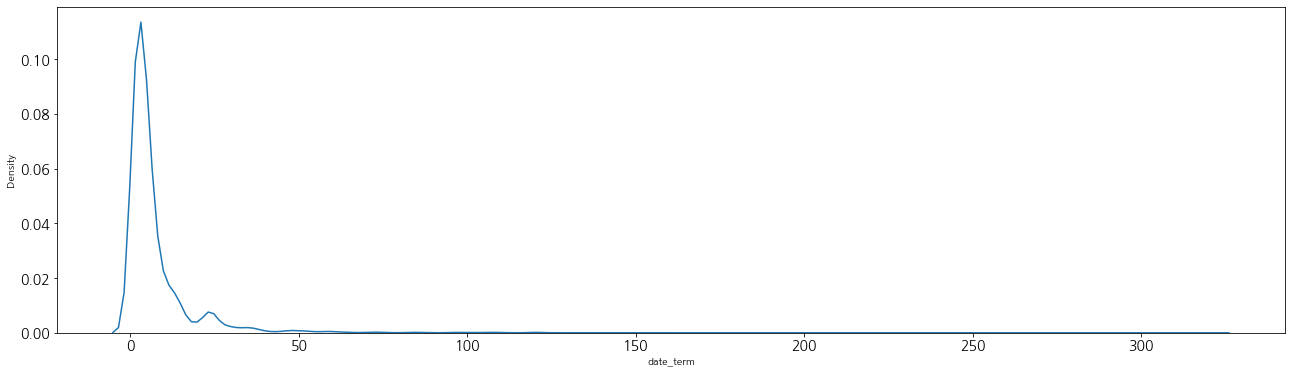

In [43]:
sns.kdeplot(df1['date_term'])

In [44]:
df1['gender'] = df1['gender'].astype(int)
df1['car_model'] = df1['car_model'].astype(int)

In [45]:
df1.describe()

,age_group,gender,car_model,r_week_day,s_week_day,is_weekend,r_weeknum,r_year,s_weeknum,s_year,date_term,term_normal
count,16052.000000,16052.000000,16052.000000,16052.000000,16052.000000,16052.000000,16052.000000,16052.0,16052.000000,16052.000000,16052.000000,16052.000000
mean,1.707202,0.802828,2.261961,3.215799,3.184027,0.334413,24.591017,2019.0,24.561612,2018.999938,7.460873,0.023259
std,0.916141,0.470085,1.627161,2.025482,2.028216,0.471800,13.458724,0.0,13.457747,0.007893,11.977531,0.037338
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2019.0,1.000000,2018.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,13.000000,2019.0,13.000000,2019.000000,2.090000,0.007000
50%,1.000000,1.000000,2.000000,3.000000,3.000000,0.000000,25.000000,2019.0,25.000000,2019.000000,3.990000,0.012000
75%,2.000000,1.000000,3.000000,5.000000,5.000000,1.000000,36.000000,2019.0,36.000000,2019.000000,7.500000,0.023000
max,5.000000,2.000000,9.000000,6.000000,6.000000,1.000000,48.000000,2019.0,52.000000,2019.000000,320.780000,1.000000


In [46]:
df2 = df1[['age_group', 'gender','car_model','r_week_day','s_week_day', 
           'is_weekend','r_weeknum','s_weeknum','date_term','term_normal']]

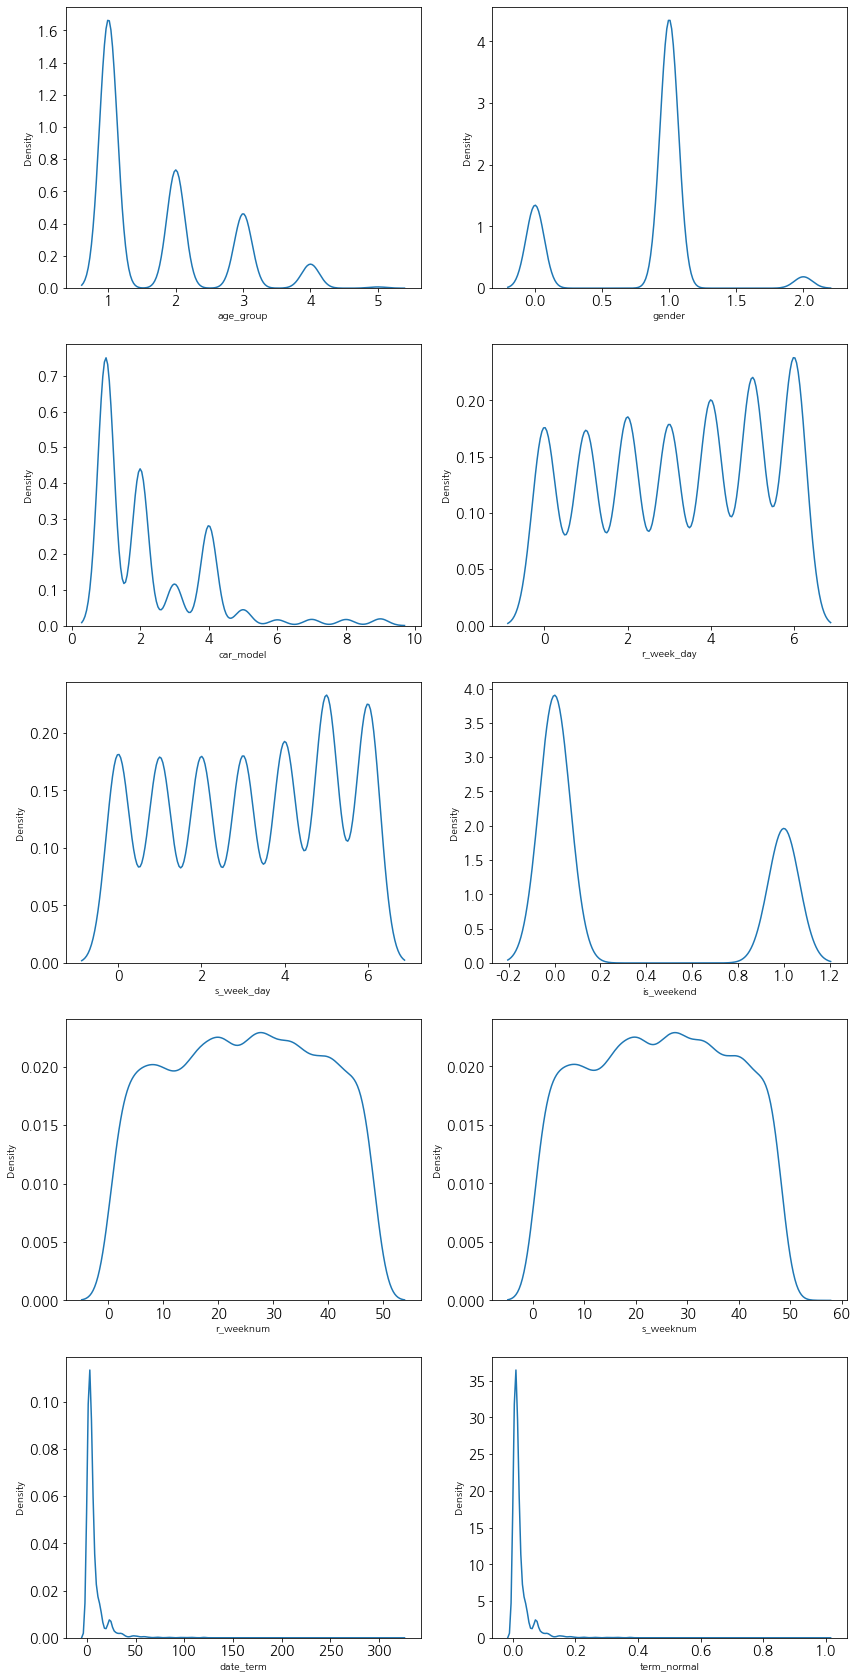

In [47]:
# 5) data 호가인 grapes ............... 중요 log변환  
# 아래거 하 ㄴ후 다시
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(5, 2, figsize=(14, 30))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

# id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 0
columns = df2.columns
for row in range(5):
    for col in range(2):
        sns.kdeplot(df2[columns[count]], ax=ax[row][col])
        #ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 10:
            break

In [48]:
len(df1)

16052

In [49]:
# # 이상치 확인 : Pclass 이상치 없음(95% 수준), age(95% 초과 : 69개  )
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col]) <= z].index

In [50]:
outlier_df = df1.loc[outlier(df1, 'date_term', 1)]   #2=95, 1 =68%
print(len(outlier_df))
print(round(len(outlier_df)/len(df1),2))

14614
0.91


In [51]:
# outlier_df = outlier_df.loc[outlier(outlier_df, 'age_group', 2)]
# len(outlier_df)

In [52]:
# outlier_df = outlier_df.loc[outlier(outlier_df, 'car_model', 2)]
# len(outlier_df)

In [53]:
# outlier_df = outlier_df.loc[outlier(outlier_df, 's_weeknum', 2)]
# len(outlier_df)

In [54]:
def arima_sarima(data):
    print('ARIMA')
    df_function = pd.DataFrame(data['reservation_start_date'].value_counts())
    df_function.reset_index(inplace = True)
    df_function.columns = ['Date', 'Demand']
    df_function.sort_values(by = ['Date'], inplace = True)
    df_function['Date'] = df_function['Date'].astype(str)

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))  
    plt.plot(df_function['Date'], df_function['Demand'])
    plt.xticks(rotation = 45)
    loc = plticker.MultipleLocator(base = 30.0) 
    ax.xaxis.set_major_locator(loc)
    plt.show()

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))  
    plt.plot(df_function['Date'][0:100], df_function['Demand'][0:100], "b.-")
    plt.xticks(rotation = 45)
    loc = plticker.MultipleLocator(base = 7.0) 
    ax.xaxis.set_major_locator(loc)
    plt.show()

    df_function['Date'] = pd.to_datetime(df_function['Date'])
    df_function.set_index('Date', inplace = True)

    demand_rate = df_function['Demand']
    STL_decomposed = STL(demand_rate, seasonal = 7, period = 7).fit()
    fig = STL_decomposed.plot()
    fig.set_size_inches(10, 16)

    for ax in fig.axes :
        loc = plticker.MultipleLocator(base = 30.0) 
        ax.xaxis.set_major_locator(loc)
        ax.xaxis.set_minor_locator(loc)
        ax.tick_params(axis='x', labelrotation = 45)
    
    plt.show()
    print(STL_decomposed.resid[STL_decomposed.resid > 0.1])

    demand_rate_replace = demand_rate.copy()
    demand_rate_replace[STL_decomposed.resid>0.1] = np.NaN
    demand_rate_replace = demand_rate_replace.interpolate(method='linear') 

    STL_decomposed_replace = STL(demand_rate_replace, seasonal = 7, period = 7).fit()
    fig = STL_decomposed_replace.plot()
    fig.set_size_inches(10, 16)

    for ax in fig.axes :
        loc = plticker.MultipleLocator(base = 30.0) 
        ax.xaxis.set_major_locator(loc)
        ax.xaxis.set_minor_locator(loc)
        ax.tick_params(axis='x', labelrotation = 45)
    
    plt.show()
    print(STL_decomposed_replace.resid[STL_decomposed_replace.resid > 0.1])    

    plot_acf(demand_rate_replace)
    plot_pacf(demand_rate_replace)
    plt.show()

    demand_rate_diff = demand_rate_replace.diff(7).dropna()
    plot_acf(demand_rate_diff)
    plot_pacf(demand_rate_diff)
    plt.show()

    demand_rate_diff = pd.DataFrame(demand_rate_diff)
    demand_rate_diff.columns = ['Diff']

    p_value = adfuller(demand_rate_diff.reset_index().Diff)[1]
    print(f'p-value of ADF test (diff 7): {p_value}')
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
    plt.plot(demand_rate_diff.reset_index().Diff);
    plt.show()

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
    plt.plot(demand_rate_diff.reset_index().Diff[0:100], "b.-")
    plt.show()

    arima_rate_train = demand_rate_diff[demand_rate_diff.index<'2019-09-08']
    arima_rate_test = demand_rate_diff[demand_rate_diff.index>='2019-09-08']
    model = sm.tsa.arima.ARIMA(arima_rate_train, order=(3, 1, 1))  
    fitted_m = model.fit()  
    print(fitted_m.summary())

    plot_predict(fitted_m)
    plt.show()

    fc = fitted_m.forecast(len(arima_rate_test), alpha = 0.05)  

    arima_rmse = np.sqrt(sklearn.metrics.mean_squared_error(arima_rate_test, fc))
    print(f'Test RMSE: {arima_rmse}\n')

    fc_series = pd.Series(fc, index = arima_rate_test.index)   

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))

    plt.plot(arima_rate_train, alpha = 0.5, color = 'black', label = 'training')
    plt.plot(arima_rate_test, alpha = 0.5, color = 'red', label = 'actual operation rate')
    plt.plot(fc_series, alpha = 0.5, color = 'blue', label = 'predicted operation rate')
    plt.legend()

    plt.xticks(rotation = 45)
    loc = plticker.MultipleLocator(base = 30.0) 
    ax.xaxis.set_major_locator(loc)

    plt.show()

    print('\n\n\n\nSARIMA')
    model_auto_arima = pm.auto_arima(arima_rate_train, seasonal = True, m = 7, D = 1) 
    print(model_auto_arima)
    print(model_auto_arima.params())
    print(model_auto_arima.aic())

    sarima_rate_pred, conf_int = model_auto_arima.predict(n_periods = arima_rate_test.shape[0], return_conf_int = True)
    sarima_rmse = np.sqrt(sklearn.metrics.mean_squared_error(arima_rate_test, sarima_rate_pred))
    print(f'Test RMSE: {sarima_rmse}\n')

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))
    plt.xticks(rotation = 45)
    loc = plticker.MultipleLocator(base = 7.0) 
    ax.xaxis.set_major_locator(loc)

    plt.plot(arima_rate_train[-50:], alpha = 0.5, color = 'black', label = 'training')
    plt.plot(arima_rate_test, alpha = 0.5, color = 'red', label = 'actual operation rate')
    plt.plot(arima_rate_test.index.values, sarima_rate_pred, alpha = 0.5, color = 'blue', label = 'predicted operation rate')
    plt.fill_between(arima_rate_test.index.values, conf_int[:, 0], conf_int[:, 1], alpha = 0.1, color = 'b') 
    plt.legend()
    plt.show()

    model_auto_arima.plot_diagnostics(figsize=(10, 10))
    plt.show()

ARIMA


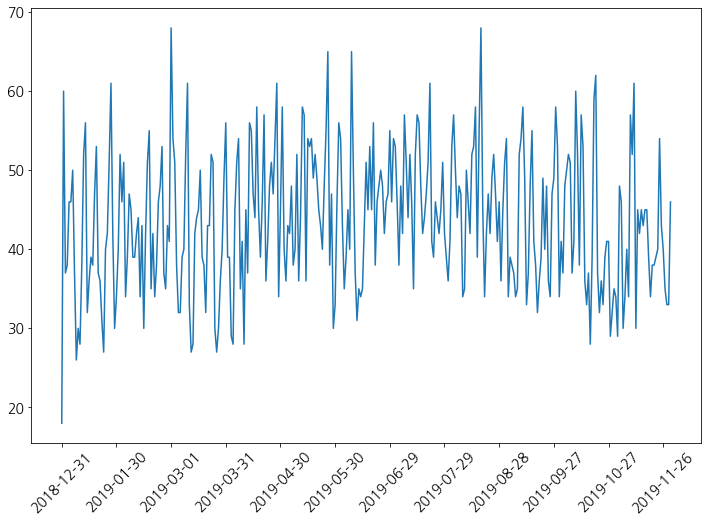

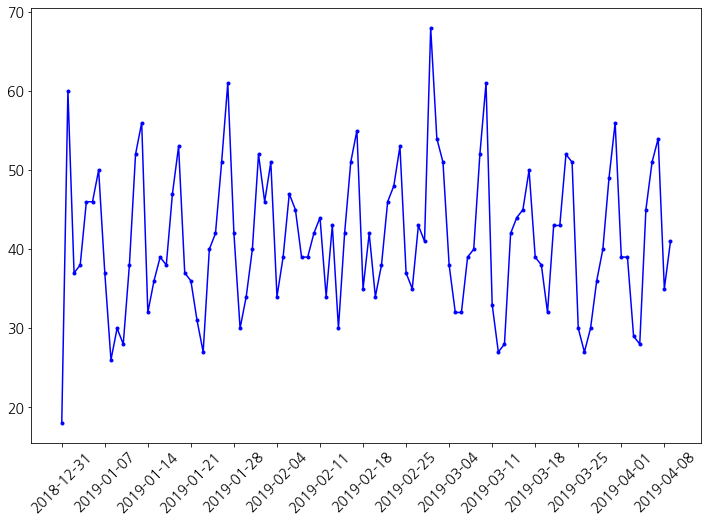

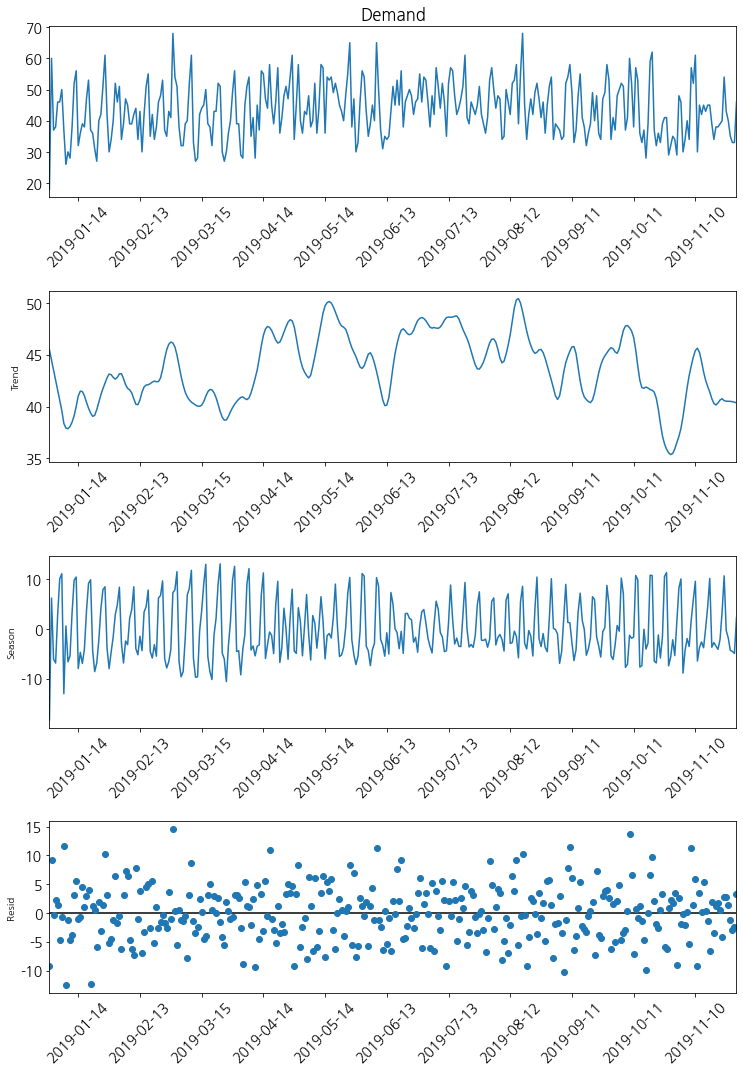

Date
2019-01-01     9.279021
2019-01-03     2.317208
2019-01-04     1.445878
2019-01-07    11.675000
2019-01-12     3.060020
                ...    
2019-11-22     0.493635
2019-11-24     2.728039
2019-11-25     2.786630
2019-11-26     1.325256
2019-11-30     3.323684
Name: resid, Length: 165, dtype: float64


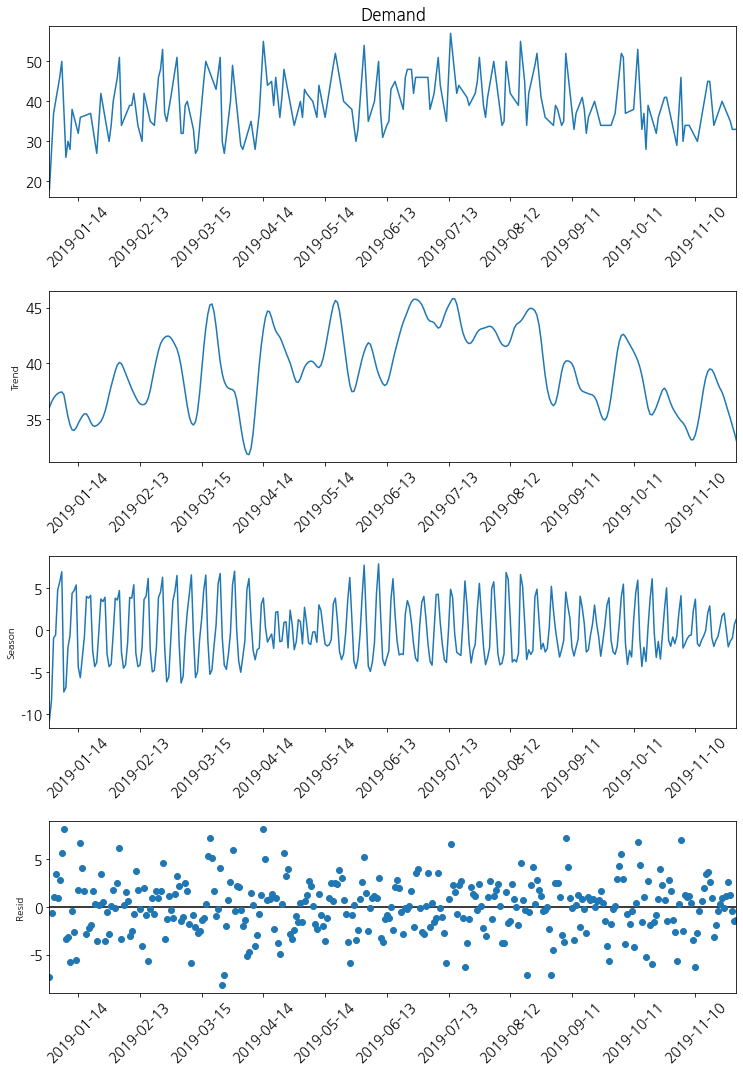

Date
2019-01-02    1.074813
2019-01-03    3.470352
2019-01-04    0.962459
2019-01-05    2.879592
2019-01-06    5.628585
                ...   
2019-11-22    0.364217
2019-11-23    0.900352
2019-11-25    1.187348
2019-11-26    2.591876
2019-11-27    1.265224
Name: resid, Length: 170, dtype: float64


/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


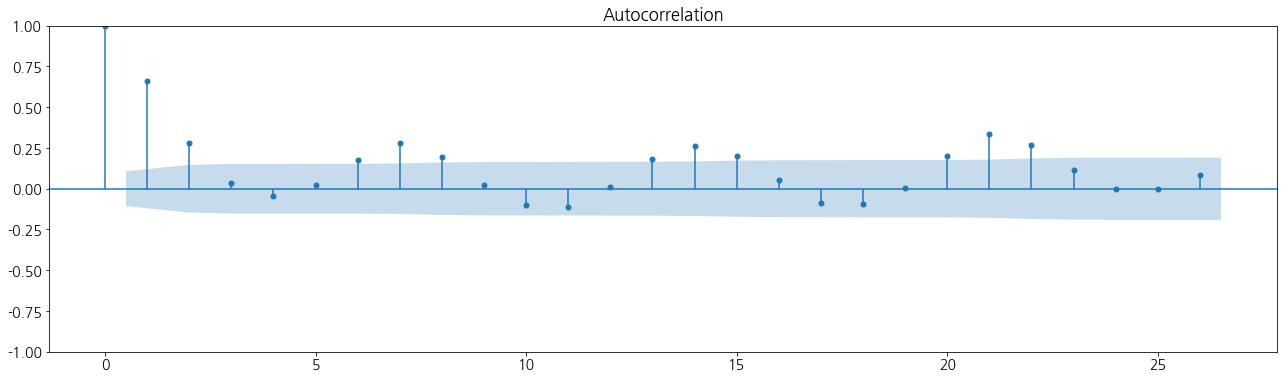

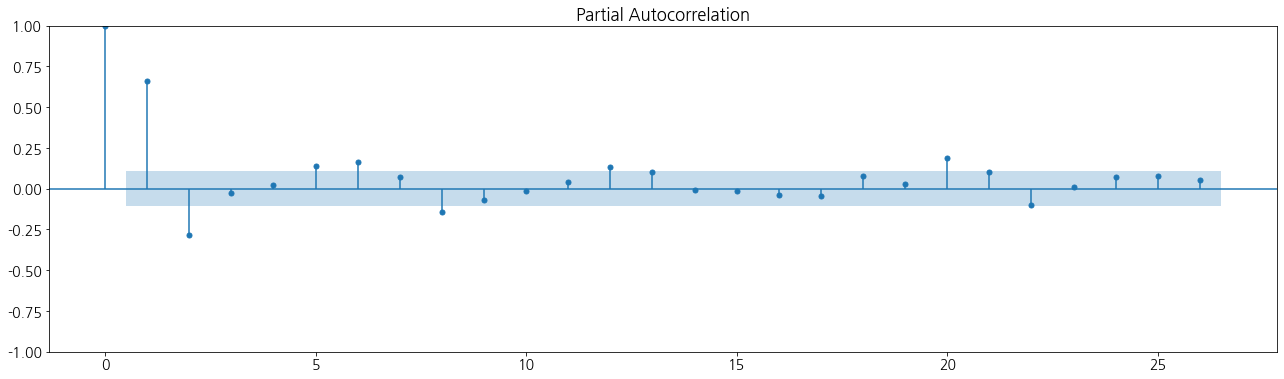

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


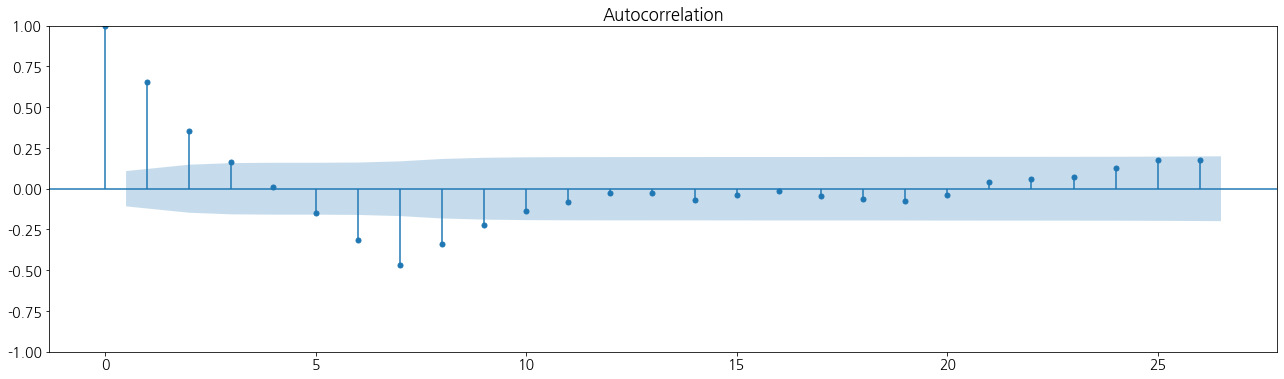

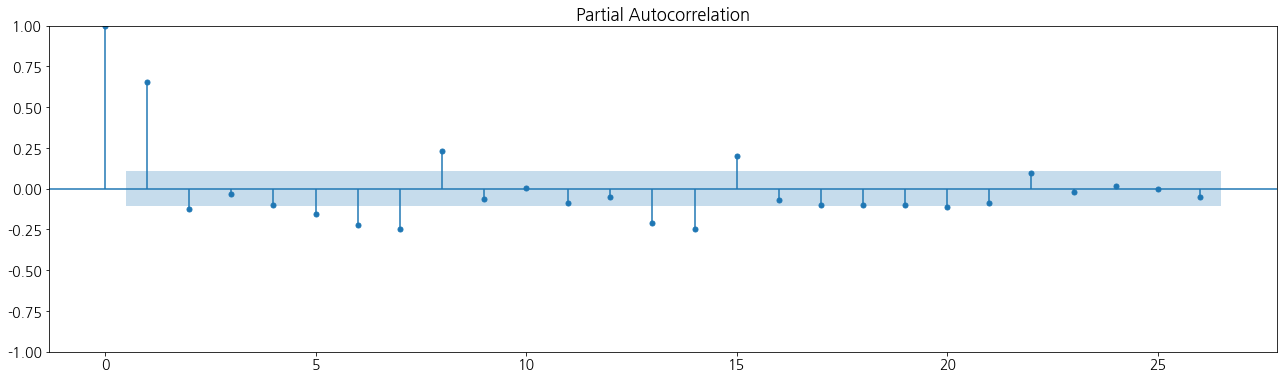

p-value of ADF test (diff 7): 4.508657580061291e-09


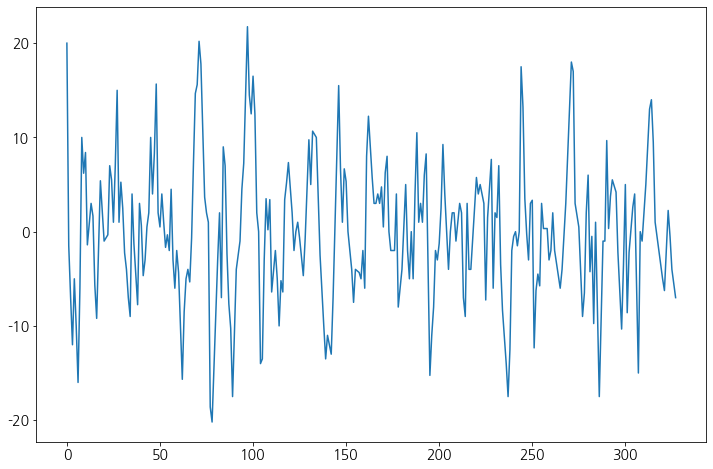

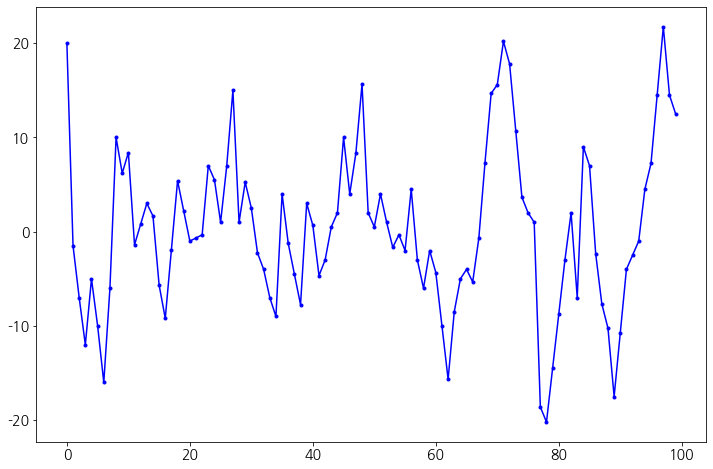

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                  244
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -770.832
Date:                Mon, 23 Jan 2023   AIC                           1551.663
Time:                        05:52:55   BIC                           1569.129
Sample:                    01-07-2019   HQIC                          1558.698
                         - 09-07-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8034      0.195     -4.118      0.000      -1.186      -0.421
ar.L2         -0.1597      0.083     -1.934      0.053      -0.321       0.002
ar.L3         -0.2080      0.065     -3.207      0.0

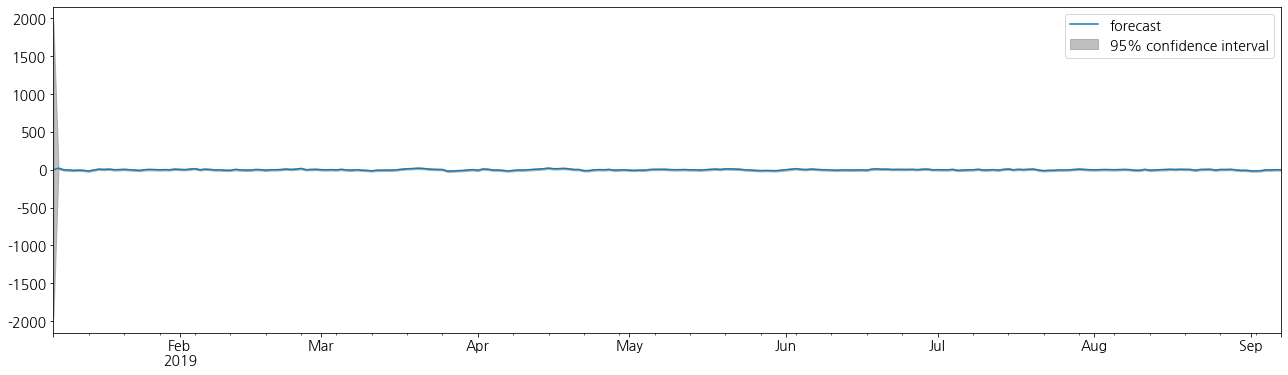

Test RMSE: 6.877693058983189



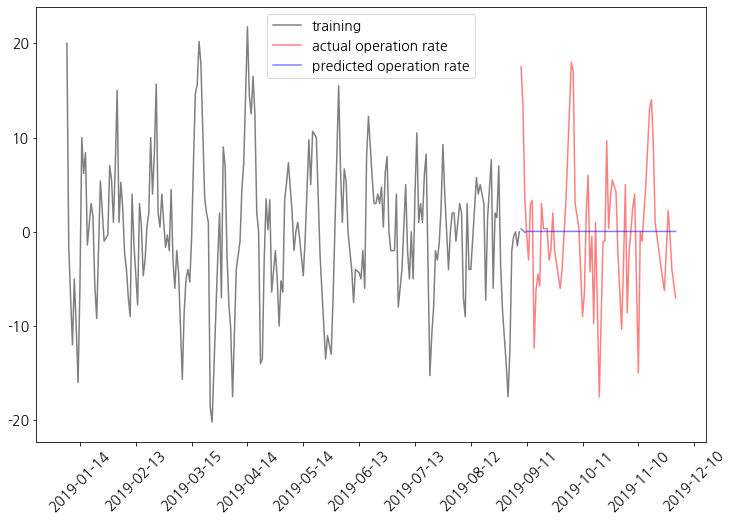





SARIMA
 ARIMA(2,0,0)(2,1,0)[7]          
[ 0.83534975 -0.178217   -0.92191554 -0.57077676 36.57344855]
1544.8482958877266
Test RMSE: 7.89772686853371



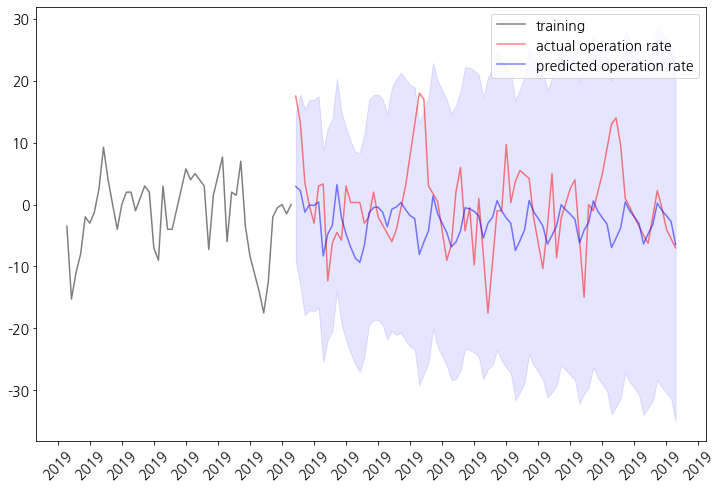

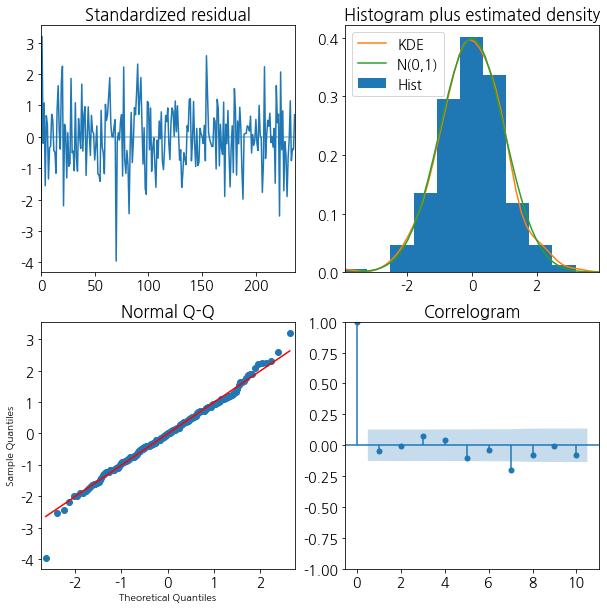

In [55]:
arima_sarima(outlier_df)

In [56]:
#age_group 제외
age1_df1 = outlier_df[outlier_df['age_group'] <= 3]
print(len(age1_df1))
car_df1 = age1_df1[age1_df1['car_model'] <= 4]
print(len(car_df1))
# age1_df1 = age1_df1.loc[outlier(age1_df1, 'age_group', 2)]
# print(len(age1_df1))

13861
13010


ARIMA


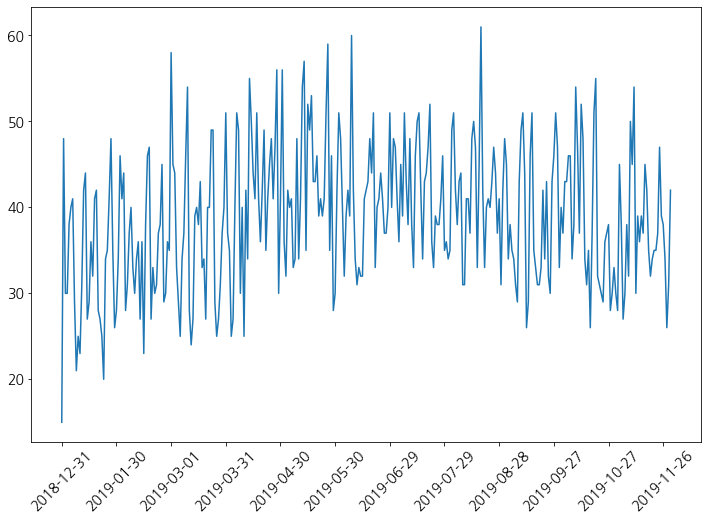

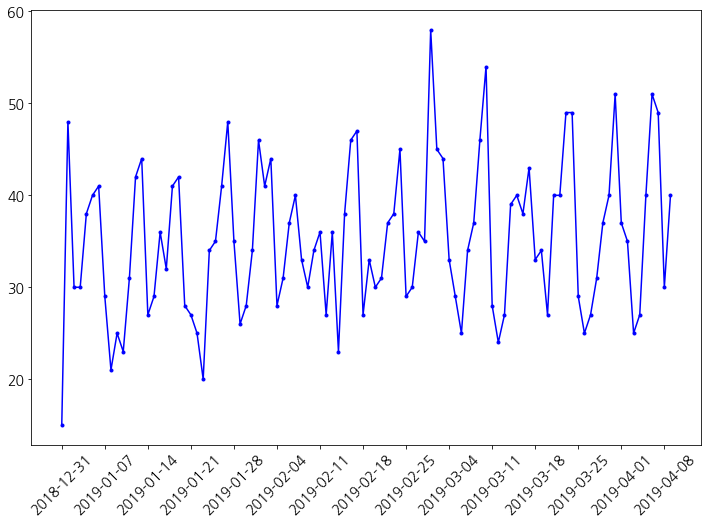

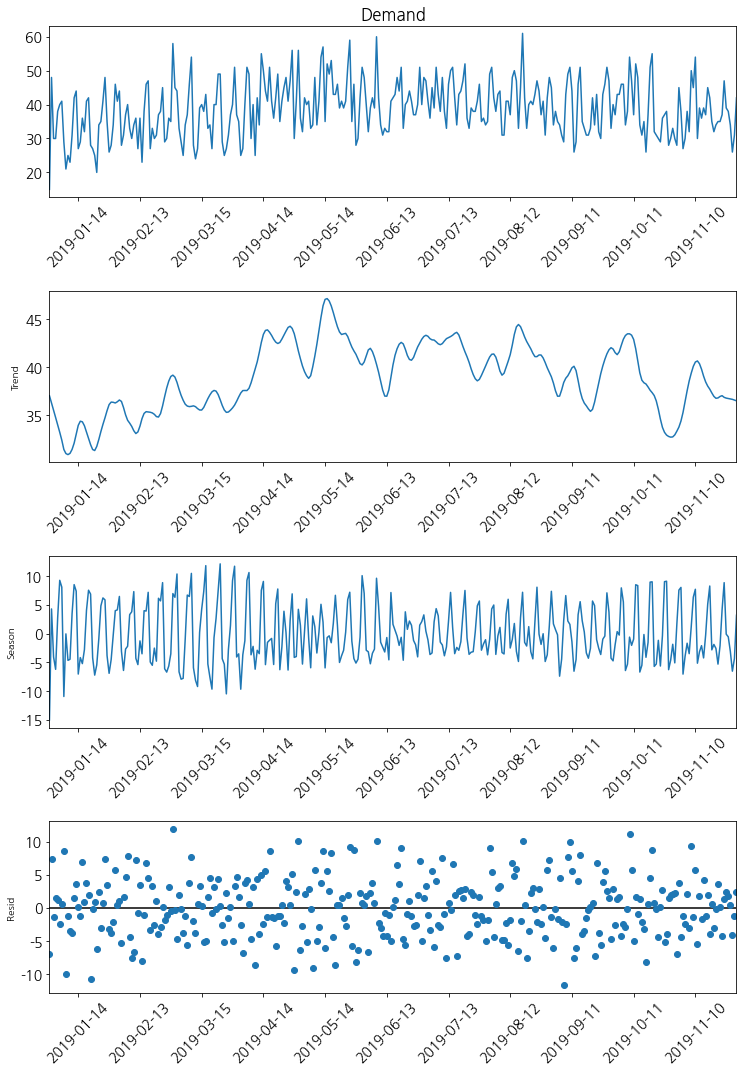

Date
2019-01-01    7.435382
2019-01-03    1.476461
2019-01-04    1.228251
2019-01-06    0.526288
2019-01-07    8.541460
                ...   
2019-11-24    1.285643
2019-11-25    2.330414
2019-11-26    1.837764
2019-11-27    0.404623
2019-11-30    2.320462
Name: resid, Length: 166, dtype: float64


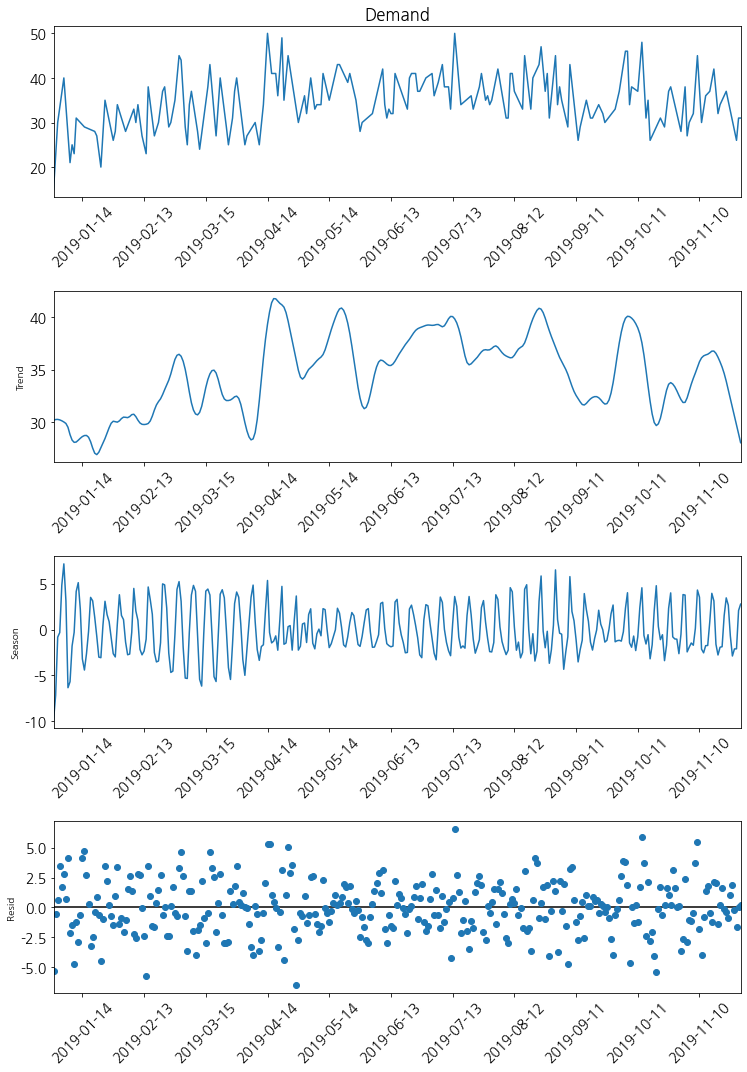

Date
2019-01-02    0.578876
2019-01-03    3.458967
2019-01-04    1.716718
2019-01-05    2.834773
2019-01-06    0.669535
                ...   
2019-11-20    0.184432
2019-11-21    1.625778
2019-11-25    1.075662
2019-11-26    1.890747
2019-11-30    0.200916
Name: resid, Length: 159, dtype: float64


/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


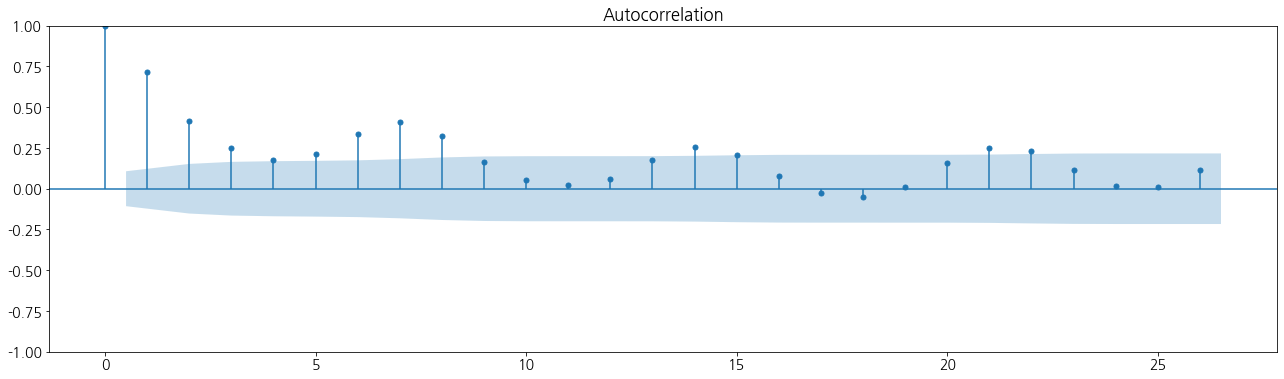

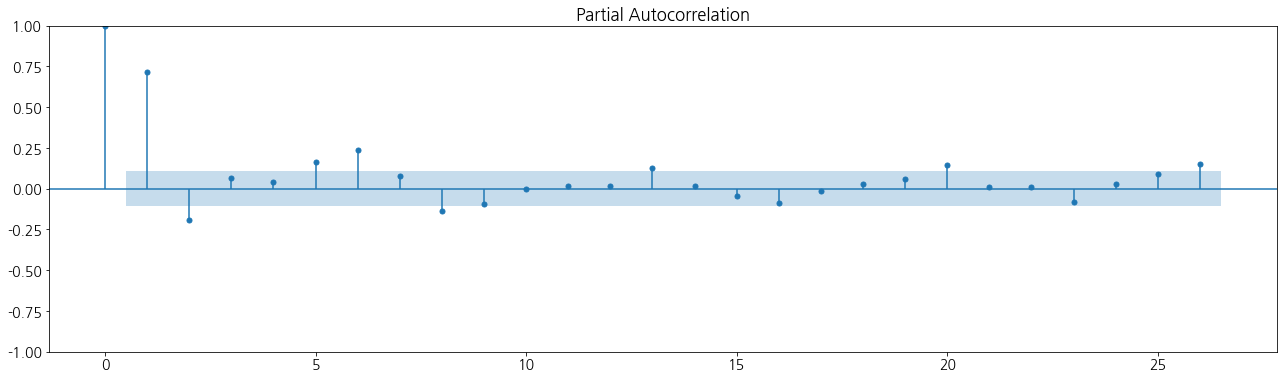

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


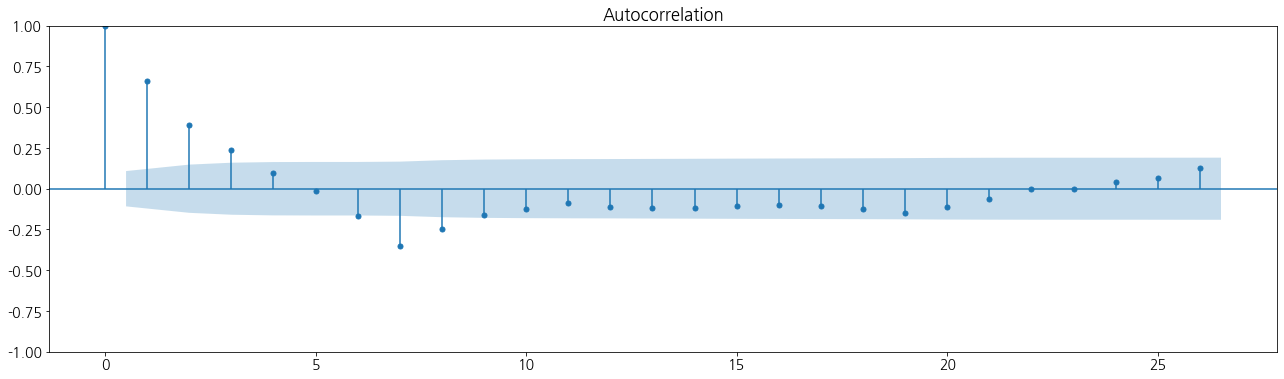

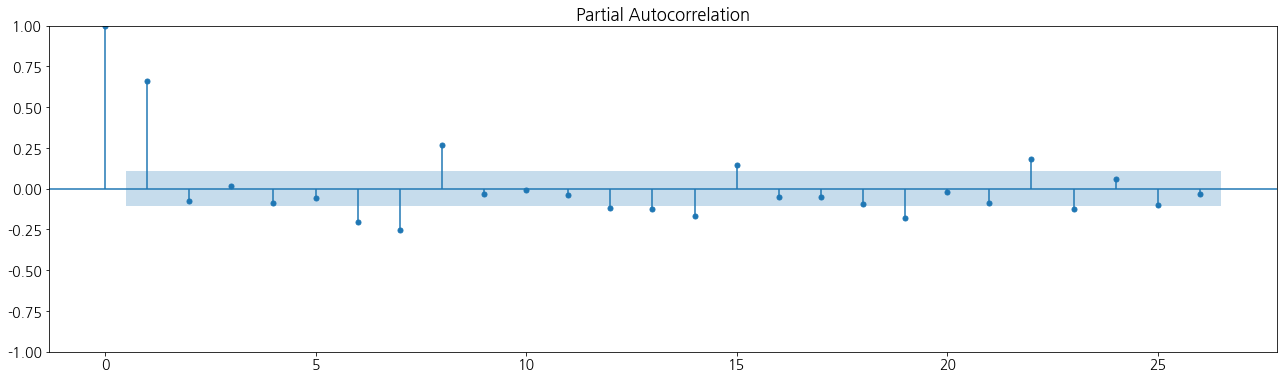

p-value of ADF test (diff 7): 1.1687662384990761e-06


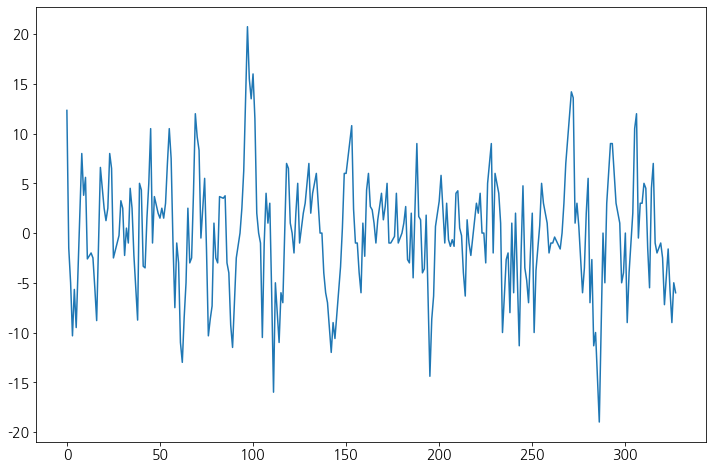

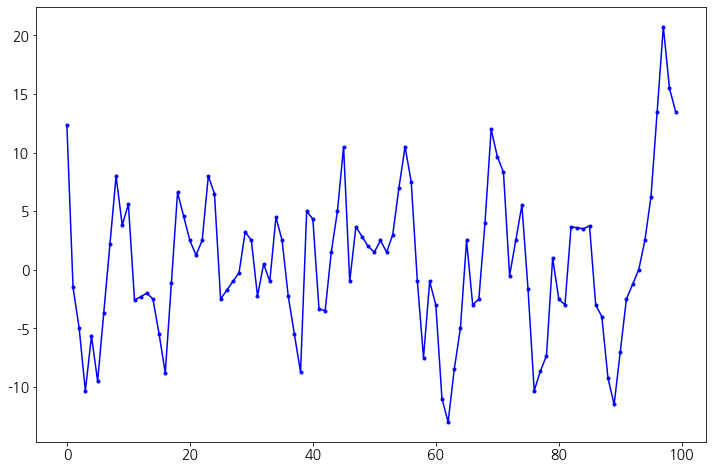

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                  244
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -700.065
Date:                Mon, 23 Jan 2023   AIC                           1410.130
Time:                        05:53:31   BIC                           1427.595
Sample:                    01-07-2019   HQIC                          1417.165
                         - 09-07-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7475      0.059     12.686      0.000       0.632       0.863
ar.L2         -0.0986      0.076     -1.291      0.197      -0.248       0.051
ar.L3         -0.0111      0.068     -0.162      0.8

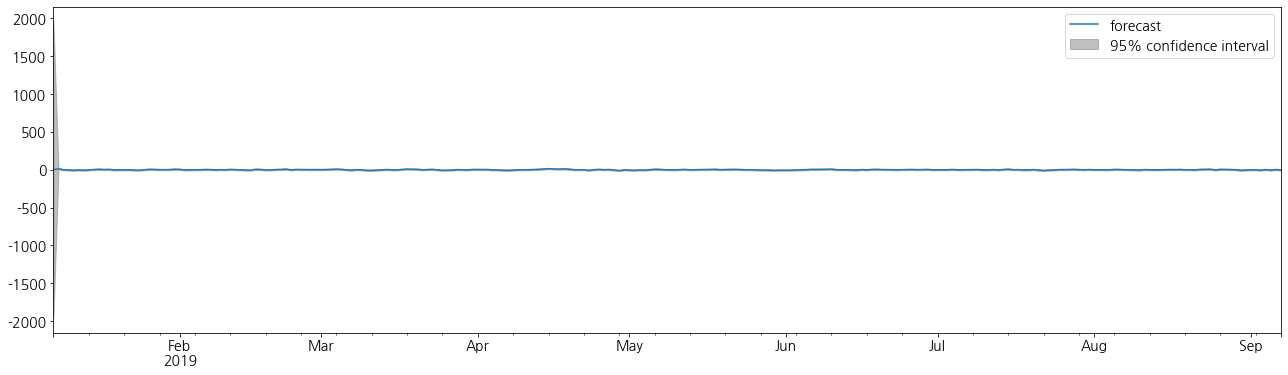

Test RMSE: 6.157290161751606



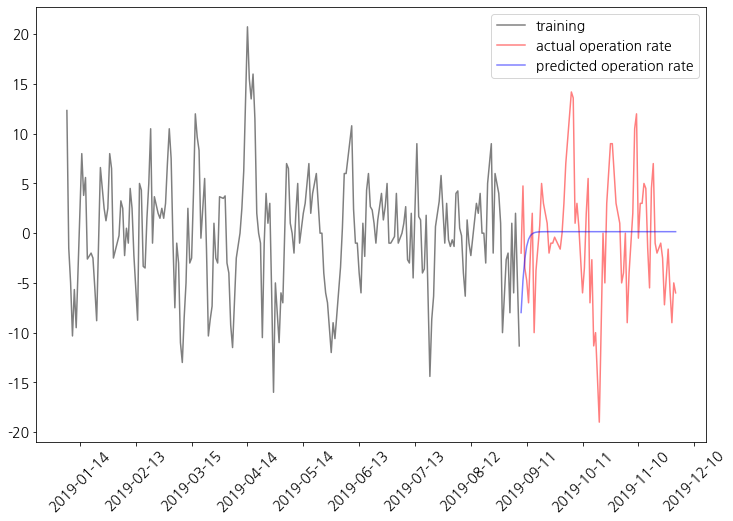





SARIMA
 ARIMA(1,0,0)(2,1,0)[7]          
[ 0.70883551 -0.93765141 -0.49666599 24.12256755]
1442.9656806726957
Test RMSE: 7.042550574590296



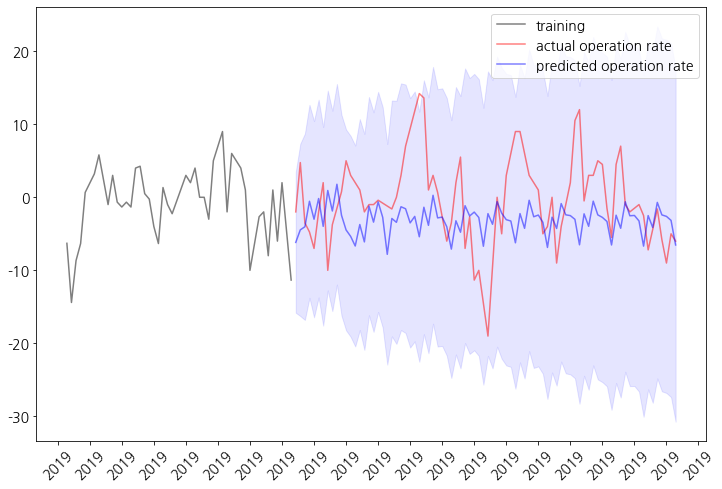

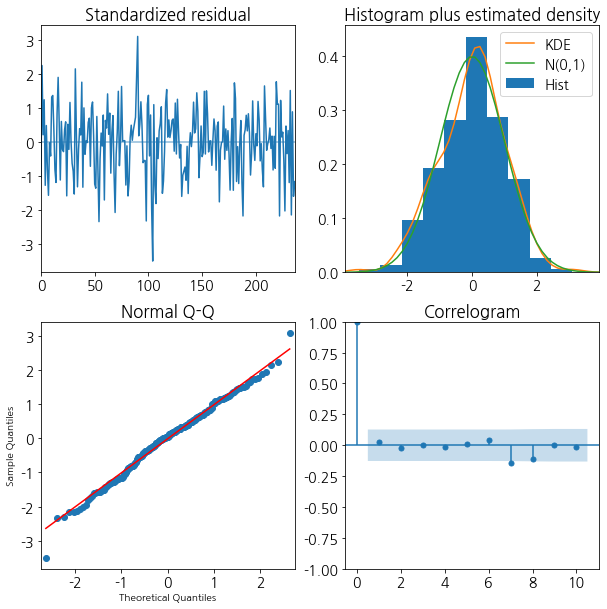

In [57]:
arima_sarima(car_df1)